In [177]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
import iris
import numpy as np
import sys
sys.path.append('/pf/b/b381639/Analysis')
import fxtian_function as fx
from iris.time import PartialDateTime
import datetime
import cf_units
import iris.coord_categorisation
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import xarray as ar

# %% list of data to read in
def data_dict(myid):
    if myid == 'sst':
        mydict = {
            'indir': '/work/bb1153/b381639/ERA5',
            'infile': '/work/bb1153/b381639/ERA5/SST_daymean_2020_tropical_ocean.nc',
            'key': iris.Constraint(cube_func=(lambda c: c.var_name == 'sst'))
        }
    if myid == 'DT':
        mydict = {
            'indir': '/work/bb1153/b381639/ERA5',
            'infile': '/work/bb1153/b381639/ERA5/DT_daymean_2020_tropical_ocean.nc',
            'key': iris.Constraint(cube_func=(lambda c: c.var_name == 'sst'))
        }       
        
    if myid == 'wsp10':
        mydict = {
            'indir': '/work/bb1153/b381639/ERA5',
            'infile': '/work/bb1153/b381639/ERA5/wsp10_daymean_2020_tropical_ocean.nc',
            'key': iris.Constraint(cube_func=(lambda c: c.var_name == 'wsp10'))
        }
    elif myid == 'slhf':
        mydict = {
            'indir': '/work/bb1153/b381639/ERA5',
            'infile': '/work/bb1153/b381639/ERA5/SLHF_daymean_2020_tropical_ocean.nc',
            'key': iris.Constraint(cube_func=(lambda c: c.var_name == 'slhf'))
        }

    elif myid == 'sshf':
        mydict = {
            'indir': '/work/bb1153/b381639/ERA5',
            'infile': '/work/bb1153/b381639/ERA5/SSHF_daymean_2020_tropical_ocean.nc',
            'key': iris.Constraint(cube_func=(lambda c: c.var_name == 'sshf'))
        }

    return(mydict)
####################

In [178]:
####################
## create correct time cubelist to save output data
cubelist_ct = iris.cube.CubeList()

##readin sfcwind
datasets=['slhf','wsp10']  #['ERAI']  # ['u-bt405','u-bt406','u-bm213','u-be034','u-bd818']
for my_dataset in datasets:
    print('--> '+my_dataset)
    mydict = data_dict(my_dataset)
    datain = iris.load_cube(mydict['infile'],mydict['key'])
#    data_time= fx.correct_time(datain)

    cubelist_ct.append(datain)
#############################

--> slhf
--> wsp10


In [199]:

##TNE
#############################
left = 200 #0
right =270 # 360
bottom =-5 # 0#-20
top = 0 #5# 20
y1=fx.selregion(cubelist_ct[0],bottom,top,left,right)
x1=fx.selregion(cubelist_ct[1],bottom,top,left,right)
# j/m2 to w/m2, upward is positive
y1.data=y1.data/-3600.
#x1.data[x1.data==0]=np.nan
#y1.data[y1.data==0]=np.nan
x1.data = x1.data.filled(fill_value=0) # np.nan)
y1.data = y1.data.filled(fill_value=0) #np.nan)



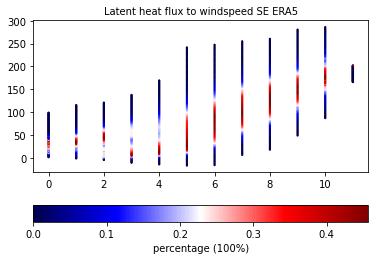

In [202]:
X1=x1.data.flatten()
Y1=y1.data.flatten()


import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt

n = 100
Arr_out=np.zeros((12,3,100))

for i in range(12):
    my=(np.where((X1 > i) & (X1 < i+1), Y1, np.nan))
    Arr_out[i,0,:]=i
    Arr_out[i,1,:], x= np.histogram(my[~np.isnan(my)], bins=n,density=True) 
    Arr_out[i,2,:] = x[:-1] + (x[1] - x[0])/2

cbar='seismic'
for i in range(12):
    plt.scatter(Arr_out[i,0,:], Arr_out[i,2,:],c=Arr_out[i,1,:],s=1.5,cmap = cbar)
    
plt.colorbar(label="percentage (100%)", orientation="horizontal")
plt.title('Latent heat flux to windspeed SE ERA5',fontsize=10)
plt.savefig('windspeed_to_SE_ERA5.eps',format='eps',dpi=1000)

In [189]:
ticks

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [157]:

ticks = np.linspace(0, 1, 5, endpoint=True)

cb = plt.colorbar(ticks=ticks)

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 432x288 with 0 Axes>

In [95]:
x.shape


(100,)

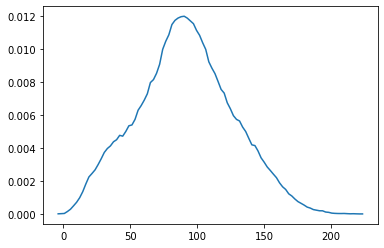

In [153]:
i=5
my=(np.where((X1 > i) & (X1 < i+1), Y1, np.nan))
#s =y1.data.where(x1.data>15)  #np.random.normal(size=N)   # generate your data sample with N elements
p, x = np.histogram(my[~np.isnan(my)], bins=n,density=True) # bin it into n = N//10 bins
x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
#f = UnivariateSpline(x, p, s=n)
plt.plot(x, p)

plt.show()

In [73]:
#colors = np.random.rand(N)
#area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

#plt.scatter(x, y, s=area, c=colors, alpha=0.5)

#X=x[:,45:55,550].data.flatten()
#Y=y[:,45:55,550].data.flatten()

X0=x0.data.flatten()
Y0=y0.data.flatten()
M0 = np.poly1d(np.polyfit(X0, Y0, 3))

X=x.data.flatten()
Y=y.data.flatten()
M = np.poly1d(np.polyfit(X, Y, 3))

X1=x1.data.flatten()
Y1=y1.data.flatten()
M1 = np.poly1d(np.polyfit(X1, Y1, 3))

X11=x11.data.flatten()
Y11=y11.data.flatten()
M11 = np.poly1d(np.polyfit(X11, Y11, 3))

/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


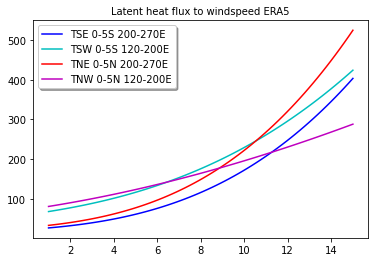

In [74]:
#plt.plot(model1(polyline), color='green')
#plt.plot(polyline, model2(polyline), color='red')
polyline = np.linspace(1, 15, 70)
#plt.scatter(X1, Y1,s=1.,alpha=None)
plt.plot(polyline,M(polyline), color='b', label='TSE 0-5S 200-270E')
plt.plot(polyline,M0(polyline), color='c', label='TSW 0-5S 120-200E')
plt.plot(polyline,M1(polyline), color='r', label='TNE 0-5N 200-270E')
plt.plot(polyline,M11(polyline), color='m',  label='TNW 0-5N 120-200E')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.title('Latent heat flux to windspeed ERA5',fontsize=10)
#plt.plot(polyline, model4(polyline), color='blue')
#plt.plot(polyline, model5(polyline), color='orange')

plt.savefig('windspeed_to_EW_ERA5.eps',format='eps',dpi=1000)

In [75]:
#############################
##TS
#############################
left = 120 #0
right =270 # 360
bottom = -5#0#-20
top = 0# 5# 20
y=fx.selregion(cubelist_ct[0],bottom,top,left,right)
x=fx.selregion(cubelist_ct[1],bottom,top,left,right)
y.data=y.data/-3600.
# j/m2 to w/m2, upward is positive
x.data[x.data==0]=np.nan
y.data[y.data==0]=np.nan
x.data = x.data.filled(fill_value=0) #np.nan)
y.data = y.data.filled(fill_value=0) #np.nan)

#############################
##TSS
#############################
left = 120 #0
right =270 # 360
bottom = -18#0#-20
top = -8# 5# 20
y0=fx.selregion(cubelist_ct[0],bottom,top,left,right)
x0=fx.selregion(cubelist_ct[1],bottom,top,left,right)
y0.data=y0.data/-3600.
# j/m2 to w/m2, upward is positive
x0.data[x0.data==0]=np.nan
y0.data[y0.data==0]=np.nan
x0.data = x0.data.filled(fill_value=0) #np.nan)
y0.data = y0.data.filled(fill_value=0) #np.nan)

#############################
##TN
#############################
left = 120 #0
right =270 # 360
bottom = 0#-20
top = 5# 20
y1=fx.selregion(cubelist_ct[0],bottom,top,left,right)
x1=fx.selregion(cubelist_ct[1],bottom,top,left,right)
y1.data=y1.data/-3600.
# j/m2 to w/m2, upward is positive
x1.data[x1.data==0]=np.nan
y1.data[y1.data==0]=np.nan
x1.data = x1.data.filled(fill_value=0) # np.nan)
y1.data = y1.data.filled(fill_value=0) #np.nan)

#############################
##TNW
#############################
left = 120 #0
right =270 # 360
bottom = 8#-20
top = 18# 20
y11=fx.selregion(cubelist_ct[0],bottom,top,left,right)
x11=fx.selregion(cubelist_ct[1],bottom,top,left,right)
y11.data=y11.data/-3600.
# j/m2 to w/m2, upward is positive
#x11.data[x11.data==0]=np.nan
#y11.data[y11.data==0]=np.nan
x11.data = x11.data.filled(fill_value=0) ## np.nan)
y11.data = y11.data.filled(fill_value=0) #np.nan)



In [76]:
#colors = np.random.rand(N)
#area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

#plt.scatter(x, y, s=area, c=colors, alpha=0.5)

#X=x[:,45:55,550].data.flatten()
#Y=y[:,45:55,550].data.flatten()

X0=x0.data.flatten()
Y0=y0.data.flatten()
M0 = np.poly1d(np.polyfit(X0, Y0, 3))

X=x.data.flatten()
Y=y.data.flatten()
M = np.poly1d(np.polyfit(X, Y, 3))

X1=x1.data.flatten()
Y1=y1.data.flatten()
M1 = np.poly1d(np.polyfit(X1, Y1, 3))

X11=x11.data.flatten()
Y11=y11.data.flatten()
M11 = np.poly1d(np.polyfit(X11, Y11, 3))

/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


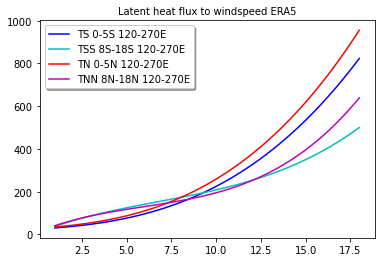

In [77]:
#plt.plot(model1(polyline), color='green')
#plt.plot(polyline, model2(polyline), color='red')
polyline = np.linspace(1, 18, 70)
#plt.scatter(X1, Y1,s=1.,alpha=None)
plt.plot(polyline,M(polyline), color='b', label='TS 0-5S 120-270E')
plt.plot(polyline,M0(polyline), color='c', label='TSS 8S-18S 120-270E')
plt.plot(polyline,M1(polyline), color='r', label='TN 0-5N 120-270E')
plt.plot(polyline,M11(polyline), color='m',  label='TNN 8N-18N 120-270E')
plt.legend(loc='best', fancybox=True, shadow=True)
#plt.plot(polyline, model4(polyline), color='blue')
#plt.plot(polyline, model5(polyline), color='orange')
plt.title('Latent heat flux to windspeed ERA5',fontsize=10)
plt.savefig('windspeed_to_NS_ERA5.eps',format='eps',dpi=1000)

In [5]:
#############################
##select region covers EURE4A
#############################
left = 0
right =360
bottom = -20
top = 20
y=fx.selregion(cubelist_ct[0],bottom,top,left,right)
x=fx.selregion(cubelist_ct[1],bottom,top,left,right)

# j/m2 to w/m2, upward is positive

y.data=y.data/-3600.


x.data = x.data.filled(fill_value=np.nan)
y.data = y.data.filled(fill_value=np.nan)

regyonx=fx.regress_yonx(x,y)

iris.save(regyonx,mydict['indir']+'/regress_sshf_wsp10_ERA5.nc')